In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4329.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4223.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4253.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4190.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4354.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4136.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4226.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4214.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4888.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4170.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4323.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4262.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4788.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4657.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4387.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4255.jpg
/kaggle/

In [2]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms
import torch.optim as optim
from torchvision import models
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import random
import warnings
warnings.filterwarnings("ignore")
from torch.utils.data import DataLoader, SubsetRandomSampler
from torchvision.datasets import ImageFolder
from sklearn.metrics import roc_curve, auc

In [3]:
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
batch_size = 32

train_dataset = ImageFolder('/kaggle/input/cat-and-dog/training_set/training_set', transform=train_transform)
test_dataset = ImageFolder('/kaggle/input/cat-and-dog/test_set/test_set', transform=val_transform)

total_train = len(train_dataset)
train_size = int(0.8 * total_train)
val_size = total_train - train_size

train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
unique_classes = set()
for images, labels in val_loader:
    unique_classes.update(labels.tolist())
print("Unique classes in val_loader:", unique_classes)
unique_classes = set()
for images, labels in train_loader:
    unique_classes.update(labels.tolist())
print("Unique classes in train_loader:", unique_classes)
for images, labels in test_loader:
    unique_classes.update(labels.tolist())
print("Unique classes in test_loader:", unique_classes)

Unique classes in val_loader: {0, 1}
Unique classes in train_loader: {0, 1}
Unique classes in test_loader: {0, 1}


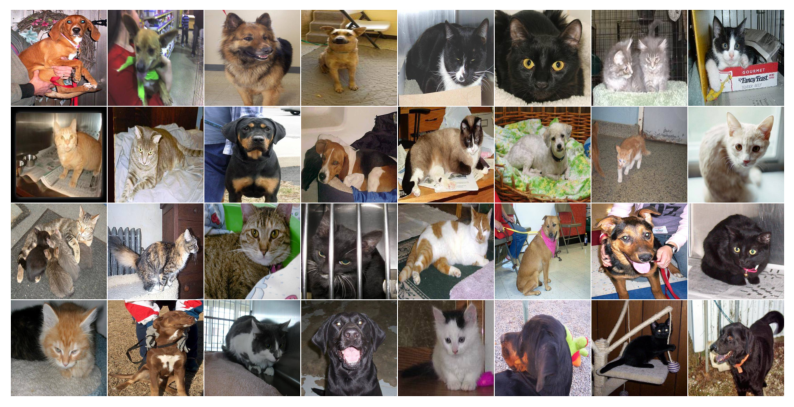

Dog   Dog   Dog   Dog   Cat   Cat   Cat   Cat   Cat   Cat   Dog   Dog   Cat   Dog   Cat   Cat   Cat   Cat   Cat   Cat   Cat   Dog   Dog   Cat   Cat   Dog   Cat   Dog   Cat   Dog   Cat   Dog  


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision

def imshow(image, classes):
    image = image / 2 + 0.5
    npimg = image.numpy()
    plt.figure(figsize=(10, 10)) 
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.subplots_adjust(wspace=1, hspace=1) 
    plt.show()

classes = ['Cat', 'Dog']
images, labels = next(iter(train_loader))

imshow(torchvision.utils.make_grid(images, pad_value=1), classes)
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(len(labels))))


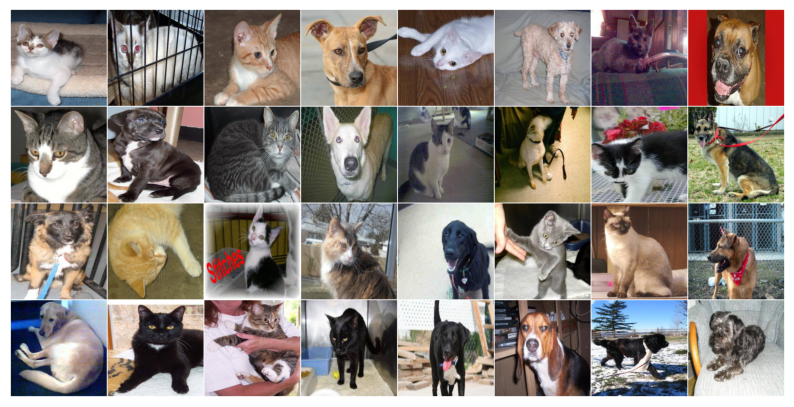

Cat   Cat   Cat   Dog   Cat   Dog   Cat   Dog   Cat   Dog   Cat   Dog   Cat   Dog   Cat   Dog   Dog   Cat   Cat   Cat   Dog   Cat   Cat   Dog   Dog   Cat   Cat   Cat   Dog   Dog   Dog   Dog  


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision

def imshow(image, classes):
    image = image / 2 + 0.5
    npimg = image.numpy()
    plt.figure(figsize=(10, 10)) 
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.subplots_adjust(wspace=1, hspace=1) 
    plt.show()

classes = ['Cat', 'Dog']
images, labels = next(iter(val_loader))

imshow(torchvision.utils.make_grid(images, pad_value=1), classes)
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(len(labels))))


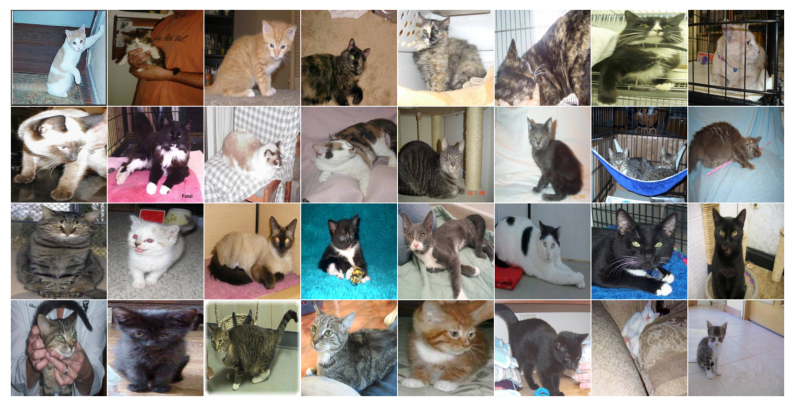

Cat   Cat   Cat   Cat   Cat   Cat   Cat   Cat   Cat   Cat   Cat   Cat   Cat   Cat   Cat   Cat   Cat   Cat   Cat   Cat   Cat   Cat   Cat   Cat   Cat   Cat   Cat   Cat   Cat   Cat   Cat   Cat  


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision

def imshow(image, classes):
    image = image / 2 + 0.5
    npimg = image.numpy()
    plt.figure(figsize=(10, 10)) 
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.subplots_adjust(wspace=1, hspace=1) 
    plt.show()

classes = ['Cat', 'Dog']
images, labels = next(iter(test_loader))

imshow(torchvision.utils.make_grid(images, pad_value=1), classes)
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(len(labels))))


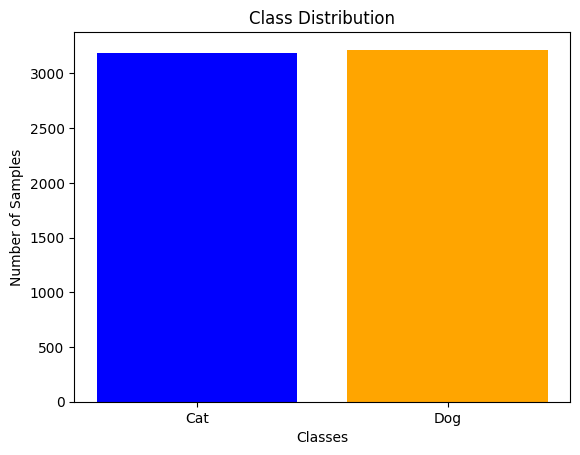

In [12]:
import matplotlib.pyplot as plt
def plot_class_distribution(dataset, classes):
    class_counts = {class_name: 0 for class_name in classes}
    
    for _, label in dataset:
        class_counts[classes[label]] += 1

    sorted_classes = sorted(classes)
    colors = ['blue','orange']
    plt.bar(sorted_classes, [class_counts[class_name] for class_name in sorted_classes], color=colors)
    plt.xlabel('Classes')
    plt.ylabel('Number of Samples')
    plt.title('Class Distribution')
    plt.show()

plot_class_distribution(train_dataset, classes)

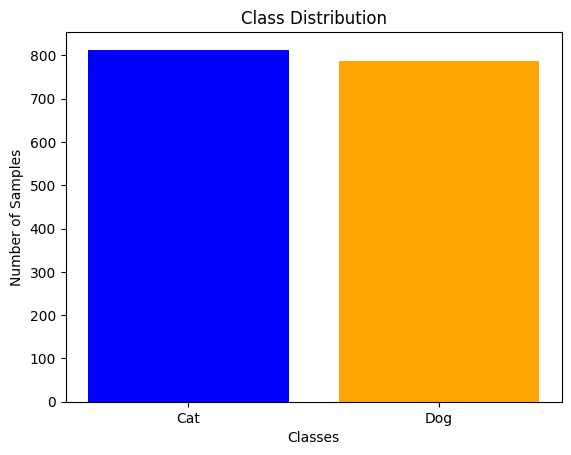

In [13]:
import matplotlib.pyplot as plt
def plot_class_distribution(dataset, classes):
    class_counts = {class_name: 0 for class_name in classes}
    
    for _, label in dataset:
        class_counts[classes[label]] += 1

    sorted_classes = sorted(classes)
    colors = ['blue','orange']
    plt.bar(sorted_classes, [class_counts[class_name] for class_name in sorted_classes], color=colors)
    plt.xlabel('Classes')
    plt.ylabel('Number of Samples')
    plt.title('Class Distribution')
    plt.show()

plot_class_distribution(val_dataset, classes)

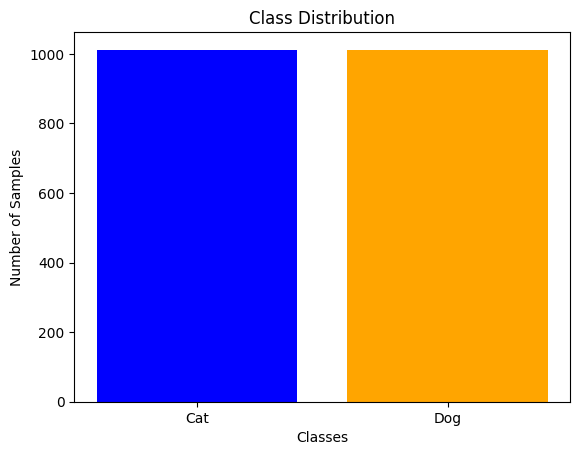

In [14]:
import matplotlib.pyplot as plt
def plot_class_distribution(dataset, classes):
    class_counts = {class_name: 0 for class_name in classes}
    
    for _, label in dataset:
        class_counts[classes[label]] += 1

    sorted_classes = sorted(classes)
    colors = ['blue','orange']
    plt.bar(sorted_classes, [class_counts[class_name] for class_name in sorted_classes], color=colors)
    plt.xlabel('Classes')
    plt.ylabel('Number of Samples')
    plt.title('Class Distribution')
    plt.show()

plot_class_distribution(test_dataset, classes)

### Batch size = 32

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * 56 * 56, 512)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(512, num_classes)
    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.flatten(x)
        x = self.relu3(self.fc1(x))
        x = self.fc2(x)
        return x
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SimpleCNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []

num_epochs = 10
for epoch in range(num_epochs):

    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    # Validation phase
    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)
    # Testing phase
    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_test += (predicted == labels).sum().item()
            total_test += labels.size(0)
    test_accuracy = correct_test / total_test
    test_loss /= len(test_loader)
    # Store losses and accuracies
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')
# Print final test accuracy
print(f'Final Test Loss: {test_loss:.4f}, Final Test Acc: {test_accuracy:.4f}')

Epoch 1/10, Train Loss: 15.1753, Train Acc: 0.4969, Val Loss: 0.6932, Val Acc: 0.5078
Epoch 2/10, Train Loss: 0.6935, Train Acc: 0.4955, Val Loss: 0.6932, Val Acc: 0.5084
Epoch 3/10, Train Loss: 0.6933, Train Acc: 0.5058, Val Loss: 0.6939, Val Acc: 0.5078
Epoch 4/10, Train Loss: 0.6935, Train Acc: 0.4939, Val Loss: 0.6933, Val Acc: 0.5078
Epoch 5/10, Train Loss: 0.6939, Train Acc: 0.4936, Val Loss: 0.6934, Val Acc: 0.4922
Epoch 6/10, Train Loss: 0.6936, Train Acc: 0.5073, Val Loss: 0.6937, Val Acc: 0.5078
Epoch 7/10, Train Loss: 0.6936, Train Acc: 0.4908, Val Loss: 0.6932, Val Acc: 0.4922
Epoch 8/10, Train Loss: 0.6936, Train Acc: 0.4933, Val Loss: 0.6931, Val Acc: 0.4922
Epoch 9/10, Train Loss: 0.6938, Train Acc: 0.5008, Val Loss: 0.6934, Val Acc: 0.5078
Epoch 10/10, Train Loss: 0.6935, Train Acc: 0.5058, Val Loss: 0.6934, Val Acc: 0.4922
Final Test Loss: 0.6932, Final Test Acc: 0.5002


In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * 56 * 56, 512)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(512, num_classes)
    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.flatten(x)
        x = self.relu3(self.fc1(x))
        x = self.fc2(x)
        return x
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SimpleCNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []

num_epochs = 10
for epoch in range(num_epochs):

    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train

    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)

    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_test += (predicted == labels).sum().item()
            total_test += labels.size(0)
    test_accuracy = correct_test / total_test
    test_loss /= len(test_loader)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

print(f'Final Test Loss: {test_loss:.4f}, Final Test Acc: {test_accuracy:.4f}')

Epoch 1/10, Train Loss: 1.0421, Train Acc: 0.5006, Val Loss: 0.6931, Val Acc: 0.4922
Epoch 2/10, Train Loss: 0.6932, Train Acc: 0.5023, Val Loss: 0.6931, Val Acc: 0.4916
Epoch 3/10, Train Loss: 0.6932, Train Acc: 0.5002, Val Loss: 0.6931, Val Acc: 0.4922
Epoch 4/10, Train Loss: 0.6932, Train Acc: 0.4938, Val Loss: 0.6931, Val Acc: 0.4922
Epoch 5/10, Train Loss: 0.6933, Train Acc: 0.4989, Val Loss: 0.6930, Val Acc: 0.4916
Epoch 6/10, Train Loss: 0.6939, Train Acc: 0.5012, Val Loss: 0.6931, Val Acc: 0.4934
Epoch 7/10, Train Loss: 0.6930, Train Acc: 0.4955, Val Loss: 0.6924, Val Acc: 0.4928
Epoch 8/10, Train Loss: 0.6906, Train Acc: 0.5342, Val Loss: 0.6785, Val Acc: 0.5715
Epoch 9/10, Train Loss: 0.6929, Train Acc: 0.5072, Val Loss: 0.6926, Val Acc: 0.4953
Epoch 10/10, Train Loss: 0.6918, Train Acc: 0.5095, Val Loss: 0.6849, Val Acc: 0.5434
Final Test Loss: 0.6809, Final Test Acc: 0.5512


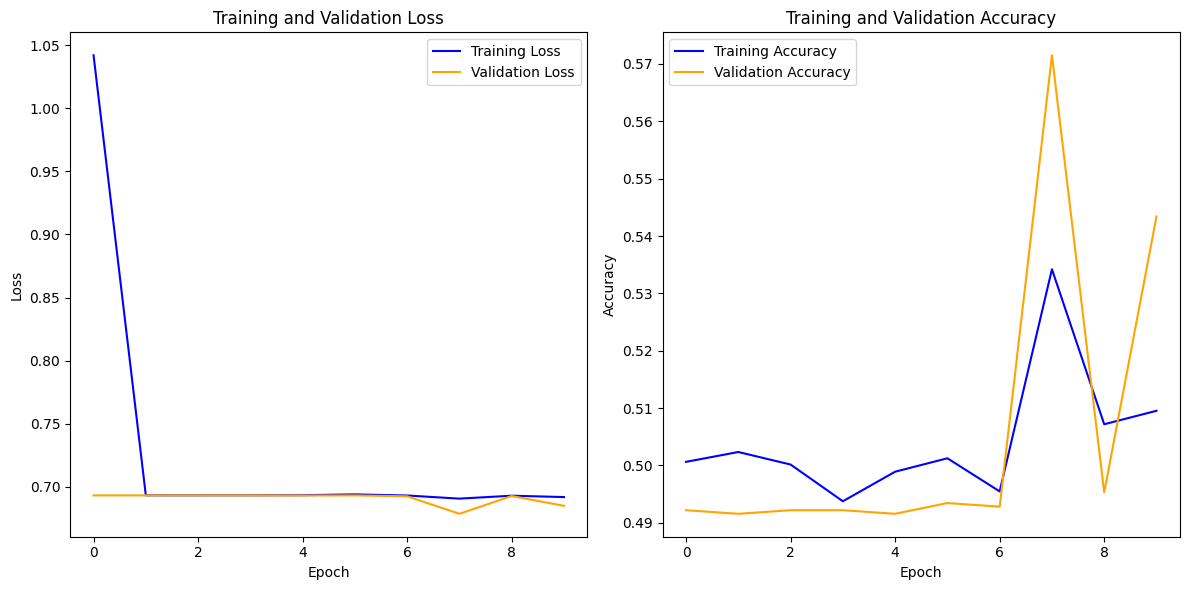

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='blue')
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * 56 * 56, 512)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(512, num_classes)
    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.flatten(x)
        x = self.relu3(self.fc1(x))
        x = self.fc2(x)
        return x
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SimpleCNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []

num_epochs = 15
for epoch in range(num_epochs):

    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train

    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)

    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_test += (predicted == labels).sum().item()
            total_test += labels.size(0)
    test_accuracy = correct_test / total_test
    test_loss /= len(test_loader)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

print(f'Final Test Loss: {test_loss:.4f}, Final Test Acc: {test_accuracy:.4f}')

Epoch 1/15, Train Loss: 0.9758, Train Acc: 0.4967, Val Loss: 0.6931, Val Acc: 0.4922
Epoch 2/15, Train Loss: 0.6932, Train Acc: 0.5030, Val Loss: 0.6931, Val Acc: 0.4922
Epoch 3/15, Train Loss: 0.6937, Train Acc: 0.5047, Val Loss: 0.6932, Val Acc: 0.5078
Epoch 4/15, Train Loss: 0.6932, Train Acc: 0.5028, Val Loss: 0.6931, Val Acc: 0.4941
Epoch 5/15, Train Loss: 0.6928, Train Acc: 0.5039, Val Loss: 0.6923, Val Acc: 0.5003
Epoch 6/15, Train Loss: 0.6929, Train Acc: 0.5006, Val Loss: 0.6930, Val Acc: 0.4922
Epoch 7/15, Train Loss: 0.6931, Train Acc: 0.5077, Val Loss: 0.6929, Val Acc: 0.4972
Epoch 8/15, Train Loss: 0.6930, Train Acc: 0.5162, Val Loss: 0.6911, Val Acc: 0.5191
Epoch 9/15, Train Loss: 0.6901, Train Acc: 0.5275, Val Loss: 0.6932, Val Acc: 0.4916
Epoch 10/15, Train Loss: 0.6933, Train Acc: 0.5017, Val Loss: 0.6931, Val Acc: 0.5041
Epoch 11/15, Train Loss: 0.6639, Train Acc: 0.5931, Val Loss: 0.6651, Val Acc: 0.6171
Epoch 12/15, Train Loss: 0.5927, Train Acc: 0.6891, Val Loss: 0

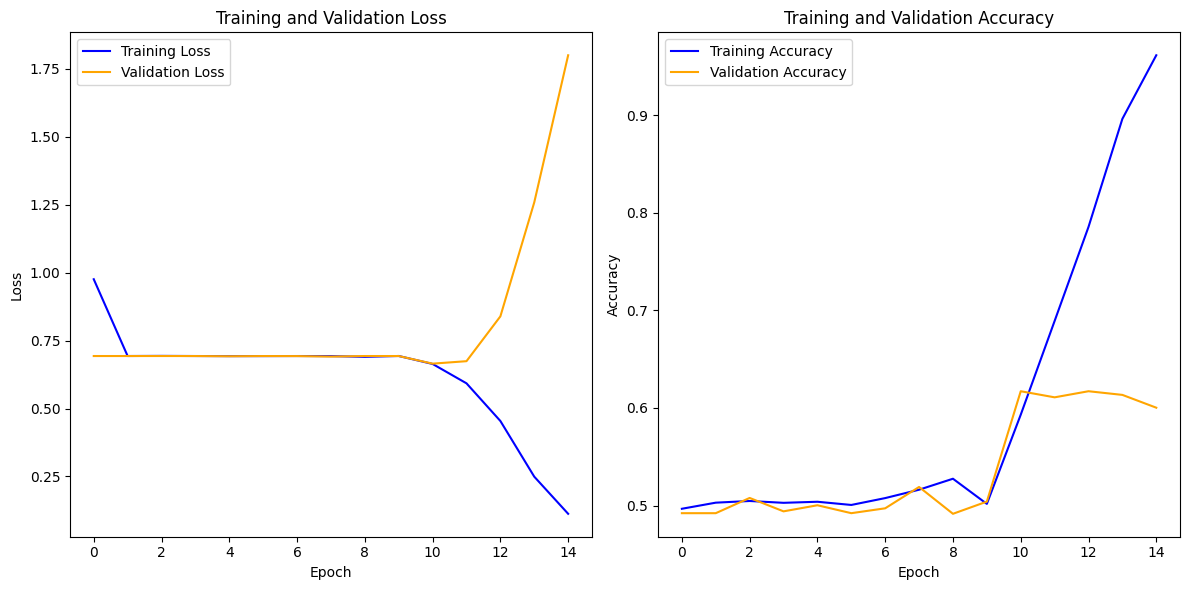

In [19]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='blue')
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [24]:
input_shape = (224, 224)
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * (input_shape[0] // 4) * (input_shape[1] // 4), 256)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(256, num_classes)
    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.flatten(x)
        x = self.relu3(self.fc1(x))
        x = self.fc2(x)
        return x
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SimpleCNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []

num_epochs = 10
for epoch in range(num_epochs):

    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train

    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)

    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_test += (predicted == labels).sum().item()
            total_test += labels.size(0)
    test_accuracy = correct_test / total_test
    test_loss /= len(test_loader)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

print(f'Final Test Loss: {test_loss:.4f}, Final Test Acc: {test_accuracy:.4f}')

Epoch 1/10, Train Loss: 1.0935, Train Acc: 0.5009, Val Loss: 0.6931, Val Acc: 0.5072
Epoch 2/10, Train Loss: 0.6938, Train Acc: 0.5037, Val Loss: 0.6932, Val Acc: 0.5078
Epoch 3/10, Train Loss: 0.6932, Train Acc: 0.4944, Val Loss: 0.6931, Val Acc: 0.4922
Epoch 4/10, Train Loss: 0.6939, Train Acc: 0.5133, Val Loss: 0.6860, Val Acc: 0.5640
Epoch 5/10, Train Loss: 0.6778, Train Acc: 0.5656, Val Loss: 0.6596, Val Acc: 0.5909
Epoch 6/10, Train Loss: 0.6439, Train Acc: 0.6177, Val Loss: 0.6359, Val Acc: 0.6227
Epoch 7/10, Train Loss: 0.6039, Train Acc: 0.6638, Val Loss: 0.6185, Val Acc: 0.6346
Epoch 8/10, Train Loss: 0.5597, Train Acc: 0.7025, Val Loss: 0.6439, Val Acc: 0.6171
Epoch 9/10, Train Loss: 0.4287, Train Acc: 0.7990, Val Loss: 0.7127, Val Acc: 0.6408
Epoch 10/10, Train Loss: 0.2331, Train Acc: 0.9054, Val Loss: 1.1220, Val Acc: 0.6140
Final Test Loss: 1.1596, Final Test Acc: 0.6189


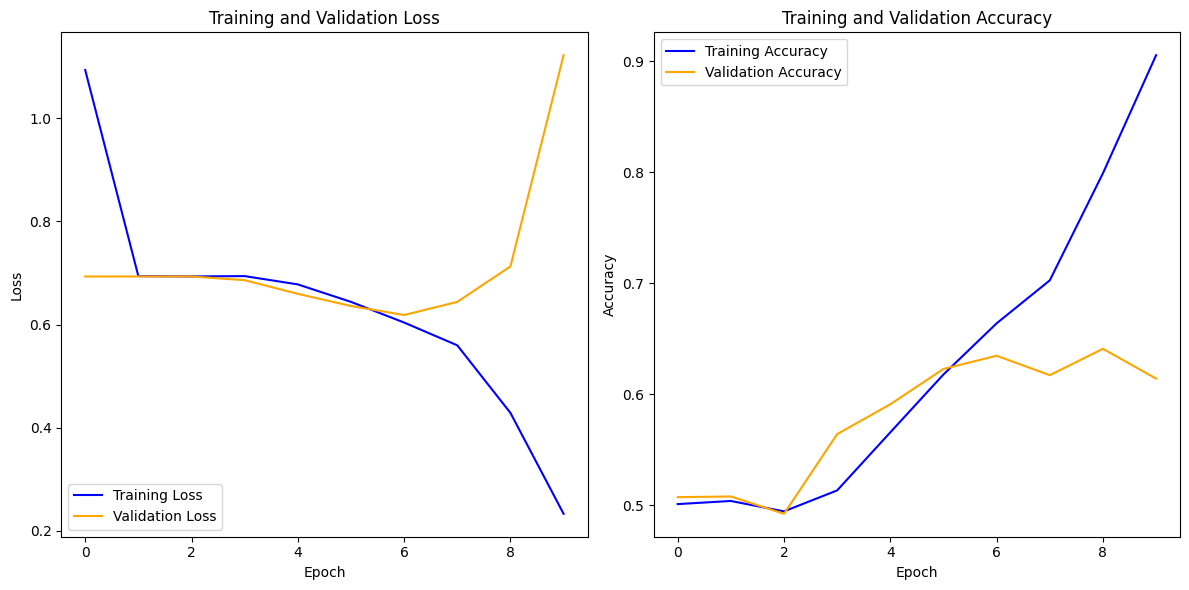

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='blue')
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [27]:
input_shape = (224, 224)
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=2, dropout_rate=0.5):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * (input_shape[0] // 4) * (input_shape[1] // 4), 256)
        self.relu3 = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout_rate)
        self.fc2 = nn.Linear(256, num_classes)
    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.flatten(x)
        x = self.relu3(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SimpleCNN(num_classes=2, dropout_rate=0.5).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []

num_epochs = 10
for epoch in range(num_epochs):

    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train

    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)

    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_test += (predicted == labels).sum().item()
            total_test += labels.size(0)
    test_accuracy = correct_test / total_test
    test_loss /= len(test_loader)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

print(f'Final Test Loss: {test_loss:.4f}, Final Test Acc: {test_accuracy:.4f}')

Epoch 1/10, Train Loss: 0.8525, Train Acc: 0.5406, Val Loss: 0.6513, Val Acc: 0.6084
Epoch 2/10, Train Loss: 0.6521, Train Acc: 0.6010, Val Loss: 0.6361, Val Acc: 0.6265
Epoch 3/10, Train Loss: 0.6190, Train Acc: 0.6368, Val Loss: 0.6189, Val Acc: 0.6321
Epoch 4/10, Train Loss: 0.5858, Train Acc: 0.6799, Val Loss: 0.6281, Val Acc: 0.6252
Epoch 5/10, Train Loss: 0.5302, Train Acc: 0.7302, Val Loss: 0.6475, Val Acc: 0.6315
Epoch 6/10, Train Loss: 0.4494, Train Acc: 0.7909, Val Loss: 0.7211, Val Acc: 0.6365
Epoch 7/10, Train Loss: 0.3427, Train Acc: 0.8465, Val Loss: 0.8631, Val Acc: 0.6215
Epoch 8/10, Train Loss: 0.2382, Train Acc: 0.9043, Val Loss: 0.9849, Val Acc: 0.6215
Epoch 9/10, Train Loss: 0.1578, Train Acc: 0.9441, Val Loss: 1.1826, Val Acc: 0.6384
Epoch 10/10, Train Loss: 0.1063, Train Acc: 0.9660, Val Loss: 1.3396, Val Acc: 0.6271
Final Test Loss: 1.3336, Final Test Acc: 0.6214


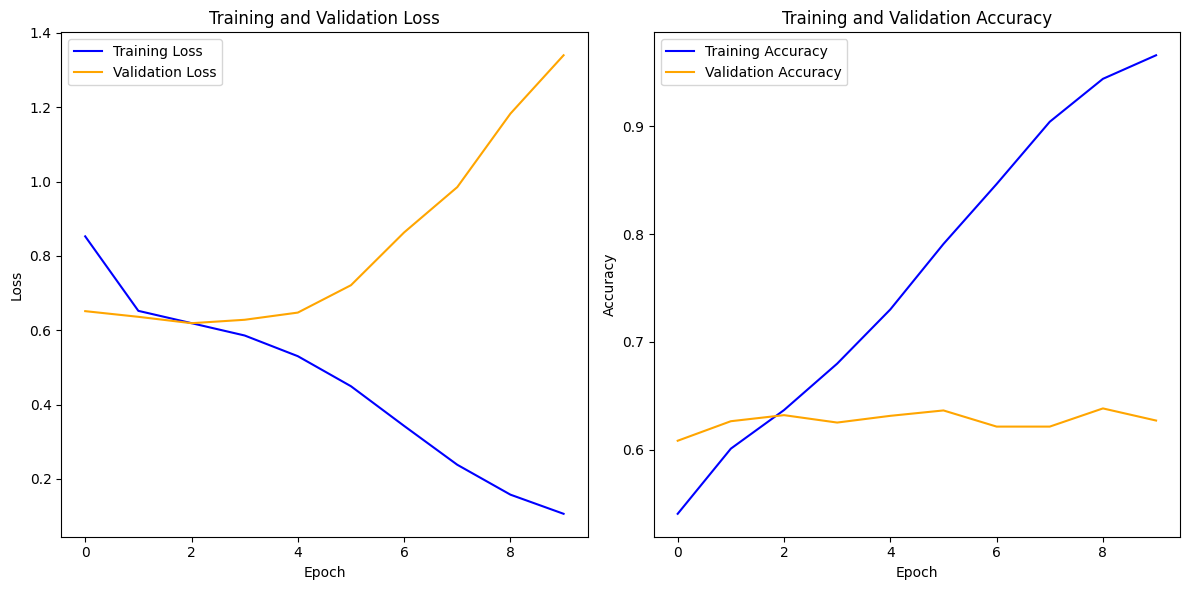

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='blue')
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [29]:
input_shape = (224, 224)
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * (input_shape[0] // 4) * (input_shape[1] // 4), 256)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(256, num_classes)
    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.flatten(x)
        x = self.relu3(self.fc1(x))
        x = self.fc2(x)
        return x
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.001)
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)
    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_test += (predicted == labels).sum().item()
            total_test += labels.size(0)
    test_accuracy = correct_test / total_test
    test_loss /= len(test_loader)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')
print(f'Final Test Loss: {test_loss:.4f}, Final Test Acc: {test_accuracy:.4f}')

Epoch 1/10, Train Loss: 1.0336, Train Acc: 0.5023, Val Loss: 0.6923, Val Acc: 0.5084
Epoch 2/10, Train Loss: 0.6824, Train Acc: 0.5628, Val Loss: 0.6611, Val Acc: 0.6034
Epoch 3/10, Train Loss: 0.6594, Train Acc: 0.6063, Val Loss: 0.6589, Val Acc: 0.6296
Epoch 4/10, Train Loss: 0.6293, Train Acc: 0.6513, Val Loss: 0.6500, Val Acc: 0.6327
Epoch 5/10, Train Loss: 0.5988, Train Acc: 0.6808, Val Loss: 0.6318, Val Acc: 0.6527
Epoch 6/10, Train Loss: 0.5659, Train Acc: 0.7066, Val Loss: 0.6497, Val Acc: 0.6446
Epoch 7/10, Train Loss: 0.5127, Train Acc: 0.7414, Val Loss: 0.6955, Val Acc: 0.6234
Epoch 8/10, Train Loss: 0.4469, Train Acc: 0.7908, Val Loss: 0.8111, Val Acc: 0.6127
Epoch 9/10, Train Loss: 0.3564, Train Acc: 0.8410, Val Loss: 0.9036, Val Acc: 0.6165
Epoch 10/10, Train Loss: 0.2555, Train Acc: 0.8948, Val Loss: 1.0684, Val Acc: 0.5971
Final Test Loss: 1.0507, Final Test Acc: 0.6125


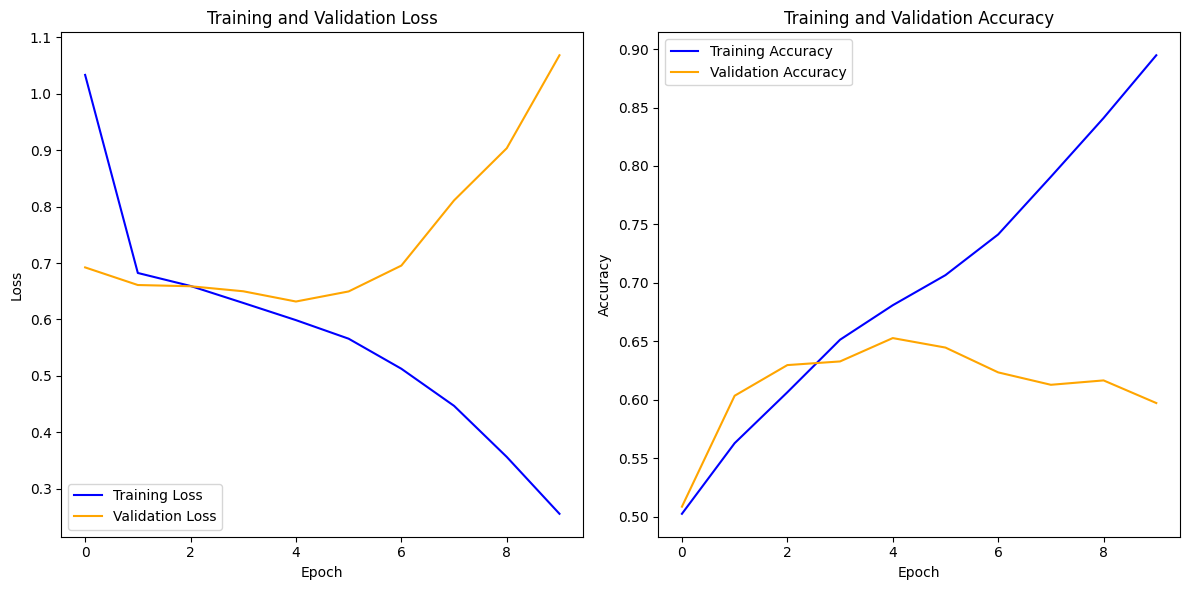

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='blue')
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


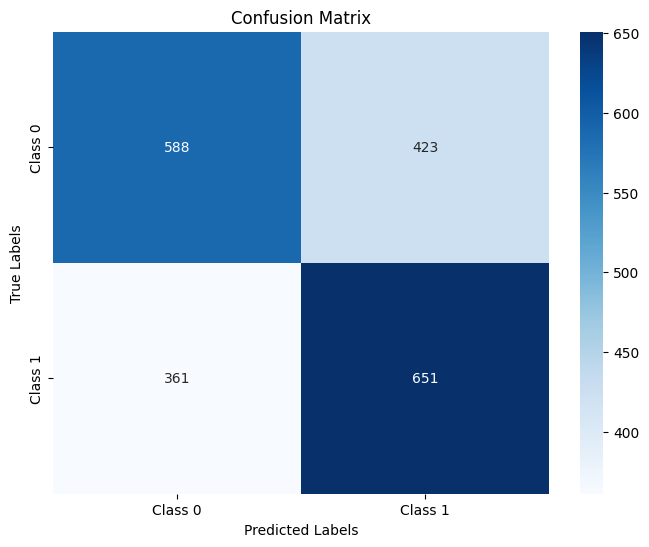

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

model.eval()
all_true_labels = []
all_predicted_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        all_true_labels.extend(labels.cpu().numpy())
        all_predicted_labels.extend(predicted.cpu().numpy())

cm = confusion_matrix(all_true_labels, all_predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [7]:
input_shape = (224, 224)
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=2, dropout_rate=0.5):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * (input_shape[0] // 8) * (input_shape[1] // 8), 256)
        self.relu4 = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout_rate)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.pool1(self.relu1(self.bn1(self.conv1(x))))
        x = self.pool2(self.relu2(self.bn2(self.conv2(x))))
        x = self.pool3(self.relu3(self.bn3(self.conv3(x))))
        x = self.flatten(x)
        x = self.relu4(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x
    
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SimpleCNN(num_classes=2, dropout_rate=0.5).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []

num_epochs = 10
for epoch in range(num_epochs):

    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train

    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)

    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_test += (predicted == labels).sum().item()
            total_test += labels.size(0)
    test_accuracy = correct_test / total_test
    test_loss /= len(test_loader)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

print(f'Final Test Loss: {test_loss:.4f}, Final Test Acc: {test_accuracy:.4f}')

Epoch 1/10, Train Loss: 4.0930, Train Acc: 0.5773, Val Loss: 0.6414, Val Acc: 0.6284
Epoch 2/10, Train Loss: 0.6445, Train Acc: 0.6310, Val Loss: 0.6281, Val Acc: 0.6321
Epoch 3/10, Train Loss: 0.6350, Train Acc: 0.6313, Val Loss: 0.6022, Val Acc: 0.6671
Epoch 4/10, Train Loss: 0.6165, Train Acc: 0.6393, Val Loss: 0.5825, Val Acc: 0.6646
Epoch 5/10, Train Loss: 0.6085, Train Acc: 0.6310, Val Loss: 0.5968, Val Acc: 0.6908
Epoch 6/10, Train Loss: 0.6077, Train Acc: 0.6483, Val Loss: 0.6188, Val Acc: 0.6490
Epoch 7/10, Train Loss: 0.6100, Train Acc: 0.6410, Val Loss: 0.5942, Val Acc: 0.6971
Epoch 8/10, Train Loss: 0.6171, Train Acc: 0.6305, Val Loss: 0.6005, Val Acc: 0.6359
Epoch 9/10, Train Loss: 0.6285, Train Acc: 0.6412, Val Loss: 0.6390, Val Acc: 0.6771
Epoch 10/10, Train Loss: 0.6285, Train Acc: 0.6398, Val Loss: 0.6240, Val Acc: 0.6546
Final Test Loss: 0.6335, Final Test Acc: 0.6431


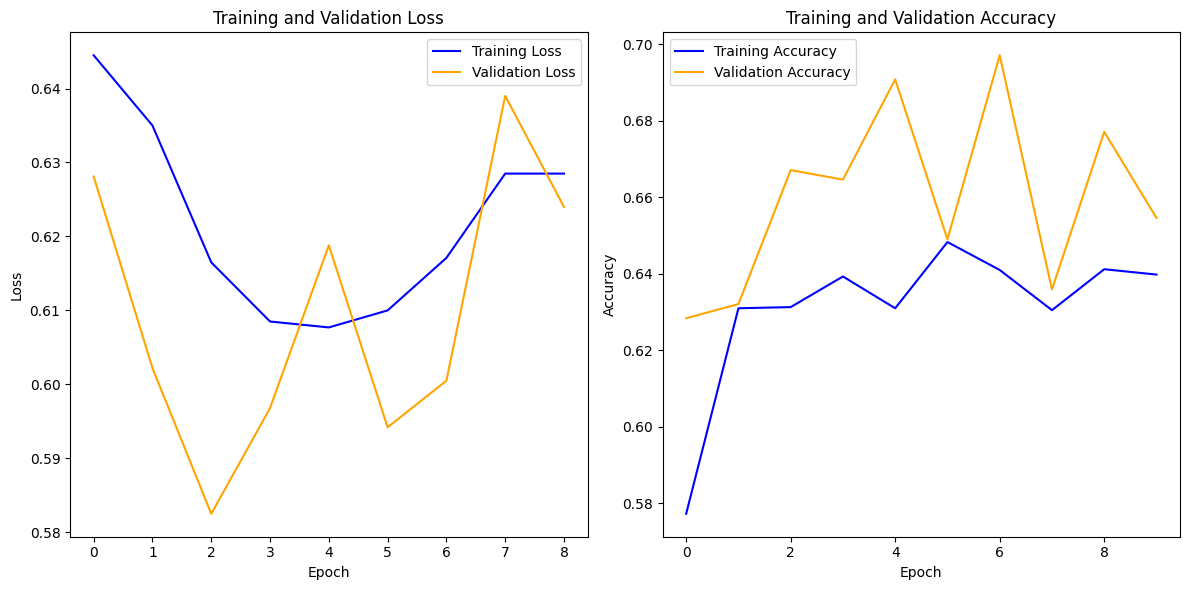

In [32]:
train_losses = [ 0.6445, 0.6350, 0.6165, 0.6085, 0.6077, 0.6100, 0.6171, 0.6285, 0.6285]
train_accuracies = [0.5773, 0.6310, 0.6313, 0.6393, 0.6310, 0.6483, 0.6410, 0.6305, 0.6412, 0.6398]
val_losses = [0.6281, 0.6022, 0.5825, 0.5968, 0.6188, 0.5942, 0.6005, 0.6390, 0.6240]
val_accuracies = [0.6284, 0.6321, 0.6671, 0.6646, 0.6908, 0.6490, 0.6971, 0.6359, 0.6771, 0.6546]

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='blue')
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [30]:
input_shape = (224, 224)
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=2, dropout_rate=0.5):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * (input_shape[0] // 8) * (input_shape[1] // 8), 256)
        self.relu4 = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout_rate)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.pool1(self.relu1(self.bn1(self.conv1(x))))
        x = self.pool2(self.relu2(self.bn2(self.conv2(x))))
        x = self.pool3(self.relu3(self.bn3(self.conv3(x))))
        x = self.flatten(x)
        x = self.relu4(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x
    
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SimpleCNN(num_classes=2, dropout_rate=0.5).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)


train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []

num_epochs = 20
for epoch in range(num_epochs):

    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train

    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)

    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_test += (predicted == labels).sum().item()
            total_test += labels.size(0)
    test_accuracy = correct_test / total_test
    test_loss /= len(test_loader)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

print(f'Final Test Loss: {test_loss:.4f}, Final Test Acc: {test_accuracy:.4f}')

KeyboardInterrupt: 

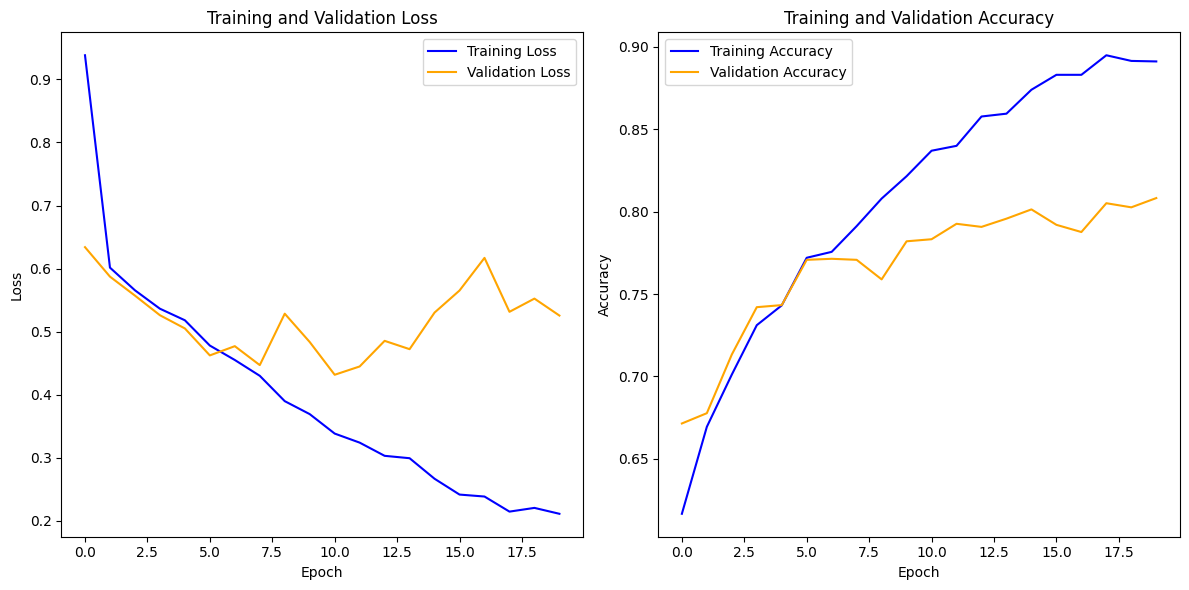

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='blue')
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [7]:
input_shape = (224, 224)
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * (input_shape[0] // 8) * (input_shape[1] // 8), 256)
        self.relu4 = nn.ReLU()
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu3(self.conv3(x)))
        x = self.flatten(x)
        x = self.relu4(self.fc1(x))
        x = self.fc2(x)
        return x
    
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SimpleCNN(num_classes=2).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)


train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []

num_epochs = 15
for epoch in range(num_epochs):

    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train

    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)

    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_test += (predicted == labels).sum().item()
            total_test += labels.size(0)
    test_accuracy = correct_test / total_test
    test_loss /= len(test_loader)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

print(f'Final Test Loss: {test_loss:.4f}, Final Test Acc: {test_accuracy:.4f}')

Epoch 1/15, Train Loss: 0.6394, Train Acc: 0.6165, Val Loss: 0.6064, Val Acc: 0.6702
Epoch 2/15, Train Loss: 0.5204, Train Acc: 0.7436, Val Loss: 0.5065, Val Acc: 0.7520
Epoch 3/15, Train Loss: 0.4296, Train Acc: 0.8034, Val Loss: 0.5042, Val Acc: 0.7483
Epoch 4/15, Train Loss: 0.3427, Train Acc: 0.8484, Val Loss: 0.5071, Val Acc: 0.7695
Epoch 5/15, Train Loss: 0.2518, Train Acc: 0.8998, Val Loss: 0.5466, Val Acc: 0.7764
Epoch 6/15, Train Loss: 0.1634, Train Acc: 0.9425, Val Loss: 0.6486, Val Acc: 0.7520
Epoch 7/15, Train Loss: 0.0909, Train Acc: 0.9717, Val Loss: 0.7751, Val Acc: 0.7552
Epoch 8/15, Train Loss: 0.0483, Train Acc: 0.9856, Val Loss: 0.8580, Val Acc: 0.7552
Epoch 9/15, Train Loss: 0.0217, Train Acc: 0.9977, Val Loss: 0.9953, Val Acc: 0.7626
Epoch 10/15, Train Loss: 0.0059, Train Acc: 1.0000, Val Loss: 1.1454, Val Acc: 0.7558
Epoch 11/15, Train Loss: 0.0024, Train Acc: 1.0000, Val Loss: 1.2621, Val Acc: 0.7608
Epoch 12/15, Train Loss: 0.0014, Train Acc: 1.0000, Val Loss: 1

In [8]:
input_shape = (224, 224)
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.flatten = nn.Flatten()
#         self.fc1 = nn.Linear(256 * (input_shape[0] // 8) * (input_shape[1] // 8), 256)
        
#         self.fc2 = nn.Linear(256, num_classes)
        self.fc1 = nn.Linear(256 * (input_shape[0] // 8) * (input_shape[1] // 8), 512)
        self.relu4 = nn.ReLU()
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu3(self.conv3(x)))
        x = self.flatten(x)
        x = self.relu4(self.fc1(x))
        x = self.fc2(x)
        return x
    
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SimpleCNN(num_classes=2).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)



train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []

num_epochs = 10
for epoch in range(num_epochs):

    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train

    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)

    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_test += (predicted == labels).sum().item()
            total_test += labels.size(0)
    test_accuracy = correct_test / total_test
    test_loss /= len(test_loader)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

print(f'Final Test Loss: {test_loss:.4f}, Final Test Acc: {test_accuracy:.4f}')

Epoch 1/10, Train Loss: 0.6931, Train Acc: 0.4995, Val Loss: 0.6931, Val Acc: 0.5178
Epoch 2/10, Train Loss: 0.6931, Train Acc: 0.4995, Val Loss: 0.6931, Val Acc: 0.5178
Epoch 3/10, Train Loss: 0.6931, Train Acc: 0.4995, Val Loss: 0.6931, Val Acc: 0.5178
Epoch 4/10, Train Loss: 0.6931, Train Acc: 0.4995, Val Loss: 0.6931, Val Acc: 0.5178
Epoch 5/10, Train Loss: 0.6931, Train Acc: 0.4995, Val Loss: 0.6931, Val Acc: 0.5178
Epoch 6/10, Train Loss: 0.6931, Train Acc: 0.4995, Val Loss: 0.6931, Val Acc: 0.5178
Epoch 7/10, Train Loss: 0.6931, Train Acc: 0.4995, Val Loss: 0.6931, Val Acc: 0.5178
Epoch 8/10, Train Loss: 0.6931, Train Acc: 0.4995, Val Loss: 0.6931, Val Acc: 0.5178
Epoch 9/10, Train Loss: 0.6932, Train Acc: 0.4995, Val Loss: 0.6931, Val Acc: 0.5178
Epoch 10/10, Train Loss: 0.6931, Train Acc: 0.4995, Val Loss: 0.6931, Val Acc: 0.5178
Final Test Loss: 0.6931, Final Test Acc: 0.5057


### CN = 4, Adagrad, BCEWithLogitsLoss

In [10]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 14 * 14, 512)
        self.relu5 = nn.ReLU()
        self.fc2 = nn.Linear(512, 1)
    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu3(self.conv3(x)))
        x = self.pool4(self.relu4(self.conv4(x)))
        x = self.flatten(x)
        x = self.relu5(self.fc1(x))
        x = self.fc2(x)
        return x
model = SimpleCNN().to(device)
optimizer = optim.Adagrad(model.parameters(), lr=0.001)
criterion = nn.BCEWithLogitsLoss()
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels.unsqueeze(1).float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        correct_train += (predicted == labels.unsqueeze(1).float()).sum().item()
        total_train += labels.size(0)
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            val_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_val += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_val += labels.size(0)
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)
    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device) 
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            test_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_test += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_test += labels.size(0)
    test_accuracy = correct_test / total_test
    test_loss /= len(test_loader)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')
print(f'Final Test Loss: {test_loss:.4f}, Final Test Acc: {test_accuracy:.4f}')

Epoch 1/10, Train Loss: 0.6630, Train Acc: 0.5899, Val Loss: 0.6452, Val Acc: 0.6334
Epoch 2/10, Train Loss: 0.6130, Train Acc: 0.6743, Val Loss: 0.6062, Val Acc: 0.6902
Epoch 3/10, Train Loss: 0.5692, Train Acc: 0.7274, Val Loss: 0.5971, Val Acc: 0.6783
Epoch 4/10, Train Loss: 0.5501, Train Acc: 0.7452, Val Loss: 0.5913, Val Acc: 0.7158
Epoch 5/10, Train Loss: 0.5328, Train Acc: 0.7667, Val Loss: 0.5515, Val Acc: 0.7427
Epoch 6/10, Train Loss: 0.5110, Train Acc: 0.7922, Val Loss: 0.5495, Val Acc: 0.7327
Epoch 7/10, Train Loss: 0.4971, Train Acc: 0.8084, Val Loss: 0.5468, Val Acc: 0.7508
Epoch 8/10, Train Loss: 0.4810, Train Acc: 0.8253, Val Loss: 0.5456, Val Acc: 0.7489
Epoch 9/10, Train Loss: 0.4688, Train Acc: 0.8389, Val Loss: 0.5311, Val Acc: 0.7639
Epoch 10/10, Train Loss: 0.4532, Train Acc: 0.8618, Val Loss: 0.5239, Val Acc: 0.7670
Final Test Loss: 0.5359, Final Test Acc: 0.7662


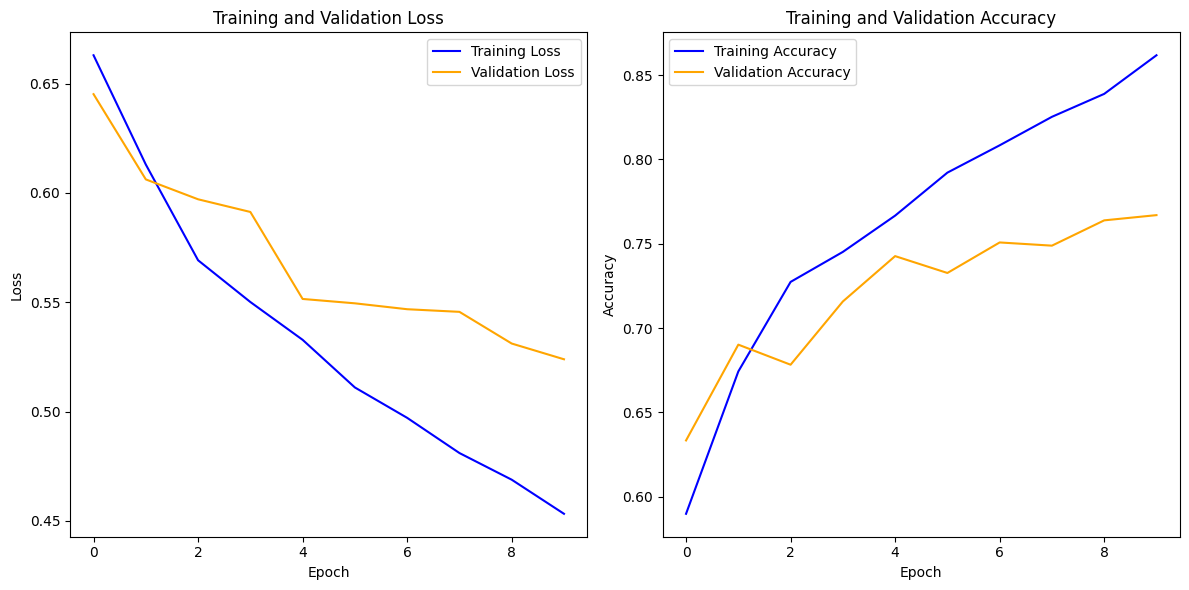

In [33]:
train_losses = [0.6630, 0.6130, 0.5692, 0.5501, 0.5328, 0.5110, 0.4971, 0.4810, 0.4688, 0.4532]
train_accuracies = [0.5899, 0.6743, 0.7274, 0.7452, 0.7667, 0.7922, 0.8084, 0.8253, 0.8389, 0.8618]
val_losses = [0.6452, 0.6062, 0.5971, 0.5913, 0.5515, 0.5495, 0.5468, 0.5456, 0.5311, 0.5239]
val_accuracies = [0.6334, 0.6902, 0.6783, 0.7158, 0.7427, 0.7327, 0.7508, 0.7489, 0.7639, 0.7670]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='blue')
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### convolution layer = 4, BCE , learning rate = 0.001

In [17]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 14 * 14, 512)
        self.relu5 = nn.ReLU()
        self.fc2 = nn.Linear(512, 1)
        
    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu3(self.conv3(x)))
        x = self.pool4(self.relu4(self.conv4(x)))
        x = self.flatten(x)
        x = self.relu5(self.fc1(x))
        x = self.fc2(x)
        return x
    
model = SimpleCNN().to(device)
optimizer = optim.Adagrad(model.parameters(), lr=0.001)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

criterion = nn.BCEWithLogitsLoss()
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels.unsqueeze(1).float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        correct_train += (predicted == labels.unsqueeze(1).float()).sum().item()
        total_train += labels.size(0)
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)  
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            val_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_val += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_val += labels.size(0)
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)
    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            test_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_test += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_test += labels.size(0)
    test_accuracy = correct_test / total_test
    test_loss /= len(test_loader)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')
print(f'Final Test Loss: {test_loss:.4f}, Final Test Acc: {test_accuracy:.4f}')

Epoch 1/10, Train Loss: 0.6616, Train Acc: 0.6031, Val Loss: 0.6000, Val Acc: 0.6883
Epoch 2/10, Train Loss: 0.5678, Train Acc: 0.7049, Val Loss: 0.5802, Val Acc: 0.6839
Epoch 3/10, Train Loss: 0.5329, Train Acc: 0.7294, Val Loss: 0.5403, Val Acc: 0.7158
Epoch 4/10, Train Loss: 0.5018, Train Acc: 0.7536, Val Loss: 0.5372, Val Acc: 0.7283
Epoch 5/10, Train Loss: 0.4726, Train Acc: 0.7730, Val Loss: 0.5233, Val Acc: 0.7477
Epoch 6/10, Train Loss: 0.4522, Train Acc: 0.7892, Val Loss: 0.4783, Val Acc: 0.7676
Epoch 7/10, Train Loss: 0.4321, Train Acc: 0.7979, Val Loss: 0.4896, Val Acc: 0.7514
Epoch 8/10, Train Loss: 0.4131, Train Acc: 0.8126, Val Loss: 0.6506, Val Acc: 0.6808
Epoch 9/10, Train Loss: 0.3968, Train Acc: 0.8196, Val Loss: 0.8298, Val Acc: 0.6446
Epoch 10/10, Train Loss: 0.3816, Train Acc: 0.8285, Val Loss: 0.4549, Val Acc: 0.7714
Final Test Loss: 0.4679, Final Test Acc: 0.7894


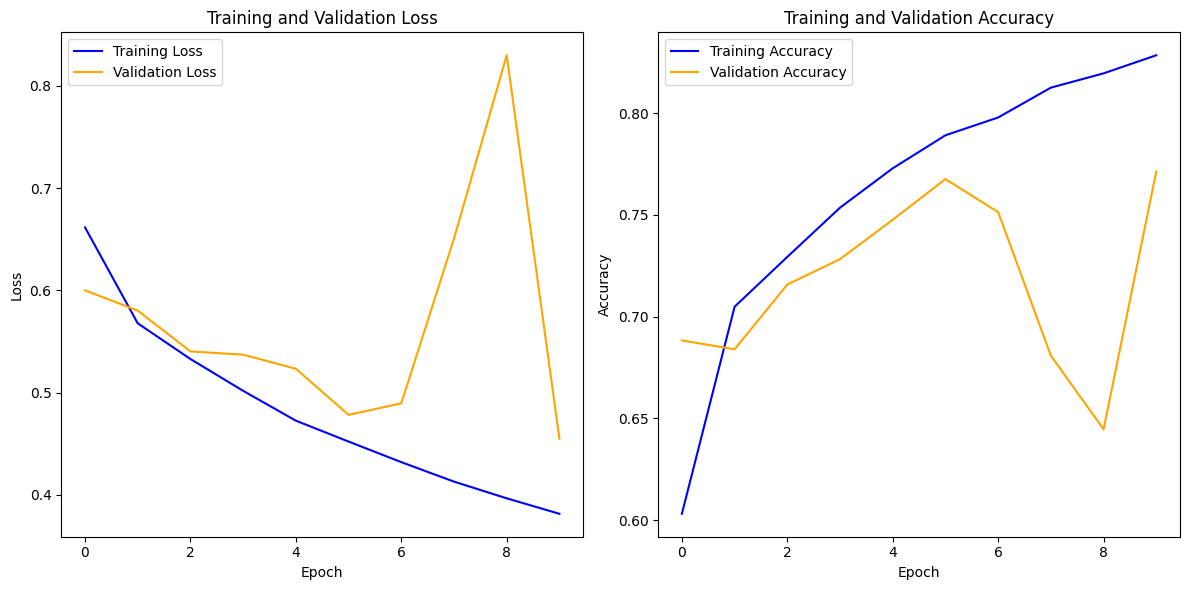

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='blue')
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### convolution layer = 4, BCE , learning rate = 0.001, weight decay = 1e-4

In [19]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 14 * 14, 512)
        self.relu5 = nn.ReLU()
        self.fc2 = nn.Linear(512, 1)
        
    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu3(self.conv3(x)))
        x = self.pool4(self.relu4(self.conv4(x)))
        x = self.flatten(x)
        x = self.relu5(self.fc1(x))
        x = self.fc2(x)
        return x
    
model = SimpleCNN().to(device)
optimizer = optim.Adagrad(model.parameters(), lr=0.001, weight_decay=1e-4)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

criterion = nn.BCEWithLogitsLoss()
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels.unsqueeze(1).float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        correct_train += (predicted == labels.unsqueeze(1).float()).sum().item()
        total_train += labels.size(0)
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)  
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            val_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_val += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_val += labels.size(0)
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)
    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            test_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_test += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_test += labels.size(0)
    test_accuracy = correct_test / total_test
    test_loss /= len(test_loader)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')
print(f'Final Test Loss: {test_loss:.4f}, Final Test Acc: {test_accuracy:.4f}')

Epoch 1/10, Train Loss: 0.6747, Train Acc: 0.5924, Val Loss: 0.6606, Val Acc: 0.6002
Epoch 2/10, Train Loss: 0.5778, Train Acc: 0.6935, Val Loss: 0.5896, Val Acc: 0.6964
Epoch 3/10, Train Loss: 0.5259, Train Acc: 0.7384, Val Loss: 0.5547, Val Acc: 0.7302
Epoch 4/10, Train Loss: 0.4878, Train Acc: 0.7636, Val Loss: 0.5333, Val Acc: 0.7470
Epoch 5/10, Train Loss: 0.4654, Train Acc: 0.7765, Val Loss: 0.5287, Val Acc: 0.7196
Epoch 6/10, Train Loss: 0.4447, Train Acc: 0.7950, Val Loss: 0.5483, Val Acc: 0.7502
Epoch 7/10, Train Loss: 0.4250, Train Acc: 0.8053, Val Loss: 0.4899, Val Acc: 0.7558
Epoch 8/10, Train Loss: 0.4021, Train Acc: 0.8167, Val Loss: 0.4628, Val Acc: 0.7776
Epoch 9/10, Train Loss: 0.3854, Train Acc: 0.8235, Val Loss: 0.4687, Val Acc: 0.7839
Epoch 10/10, Train Loss: 0.3718, Train Acc: 0.8368, Val Loss: 0.4431, Val Acc: 0.7983
Final Test Loss: 0.4571, Final Test Acc: 0.7939


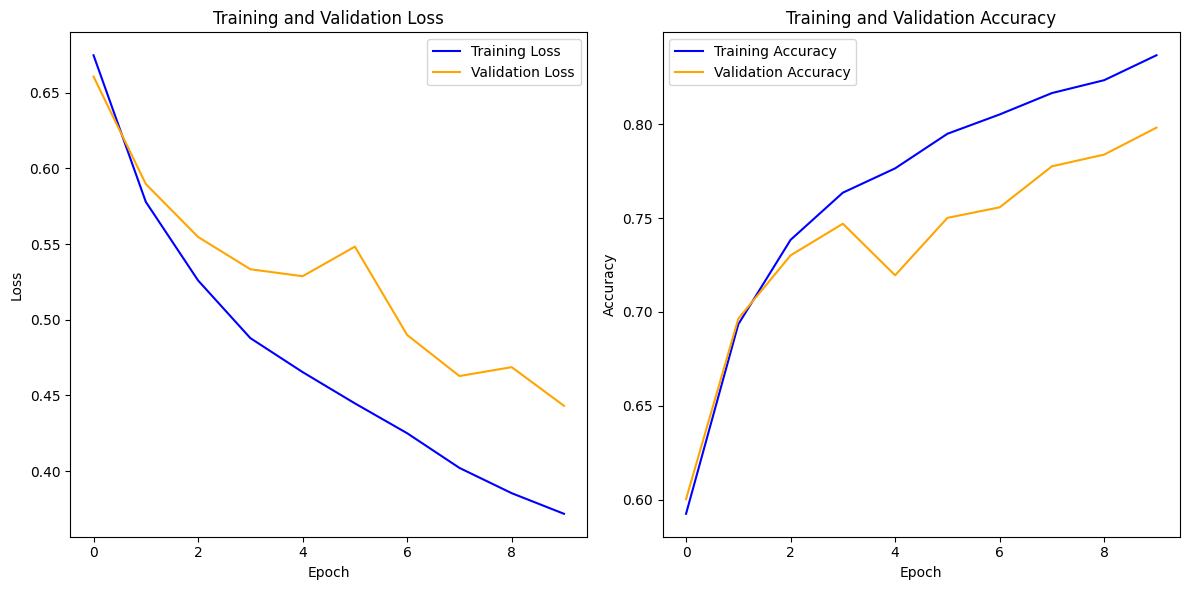

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='blue')
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### 1e-3

In [21]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 14 * 14, 512)
        self.relu5 = nn.ReLU()
        self.fc2 = nn.Linear(512, 1)
        
    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu3(self.conv3(x)))
        x = self.pool4(self.relu4(self.conv4(x)))
        x = self.flatten(x)
        x = self.relu5(self.fc1(x))
        x = self.fc2(x)
        return x
    
model = SimpleCNN().to(device)
optimizer = optim.Adagrad(model.parameters(), lr=0.001, weight_decay=1e-4)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

criterion = nn.BCEWithLogitsLoss()
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels.unsqueeze(1).float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        correct_train += (predicted == labels.unsqueeze(1).float()).sum().item()
        total_train += labels.size(0)
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)  
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            val_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_val += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_val += labels.size(0)
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)
    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            test_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_test += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_test += labels.size(0)
    test_accuracy = correct_test / total_test
    test_loss /= len(test_loader)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')
print(f'Final Test Loss: {test_loss:.4f}, Final Test Acc: {test_accuracy:.4f}')

Epoch 1/10, Train Loss: 0.6565, Train Acc: 0.6070, Val Loss: 0.6229, Val Acc: 0.6359
Epoch 2/10, Train Loss: 0.5660, Train Acc: 0.7067, Val Loss: 0.6702, Val Acc: 0.6221
Epoch 3/10, Train Loss: 0.5155, Train Acc: 0.7452, Val Loss: 0.5968, Val Acc: 0.6902
Epoch 4/10, Train Loss: 0.4875, Train Acc: 0.7648, Val Loss: 0.5475, Val Acc: 0.7258
Epoch 5/10, Train Loss: 0.4646, Train Acc: 0.7795, Val Loss: 0.5013, Val Acc: 0.7514
Epoch 6/10, Train Loss: 0.4491, Train Acc: 0.7886, Val Loss: 0.4754, Val Acc: 0.7758
Epoch 7/10, Train Loss: 0.4296, Train Acc: 0.8001, Val Loss: 0.4994, Val Acc: 0.7570
Epoch 8/10, Train Loss: 0.4133, Train Acc: 0.8070, Val Loss: 0.4729, Val Acc: 0.7833
Epoch 9/10, Train Loss: 0.3987, Train Acc: 0.8187, Val Loss: 0.5380, Val Acc: 0.7414
Epoch 10/10, Train Loss: 0.3877, Train Acc: 0.8270, Val Loss: 0.6811, Val Acc: 0.6827
Final Test Loss: 0.6746, Final Test Acc: 0.6733


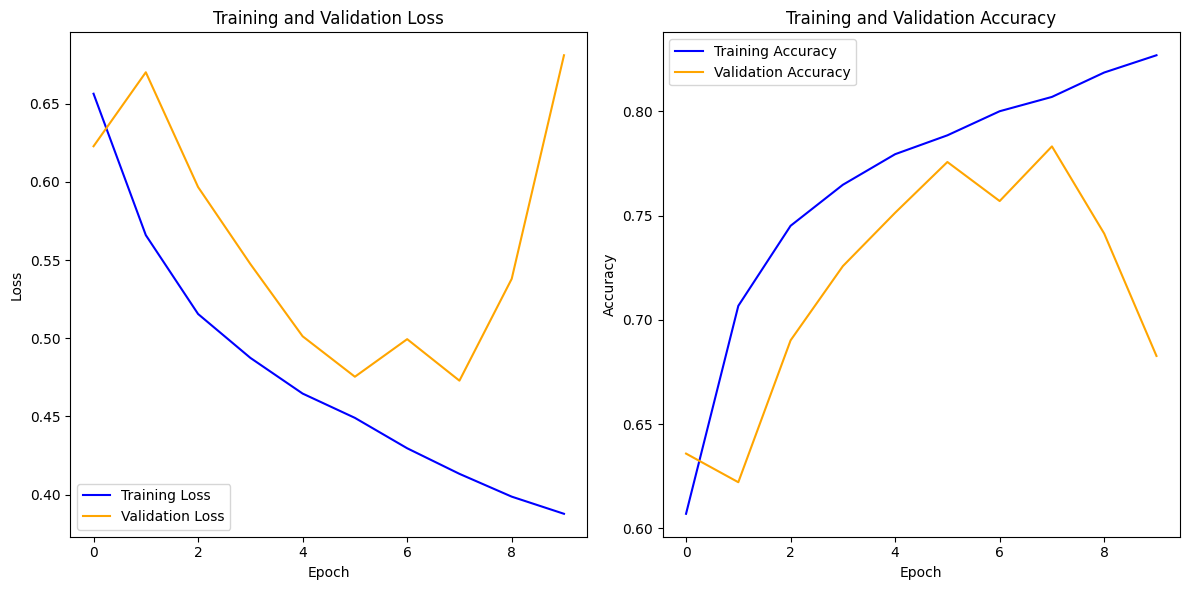

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='blue')
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### epoch = 15, lr=0.001, weight_decay=1e-4, BCEWithLogitsLoss(), Adagrad

In [23]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 14 * 14, 512)
        self.relu5 = nn.ReLU()
        self.fc2 = nn.Linear(512, 1)
        
    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu3(self.conv3(x)))
        x = self.pool4(self.relu4(self.conv4(x)))
        x = self.flatten(x)
        x = self.relu5(self.fc1(x))
        x = self.fc2(x)
        return x
    
model = SimpleCNN().to(device)
optimizer = optim.Adagrad(model.parameters(), lr=0.001, weight_decay=1e-4)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

criterion = nn.BCEWithLogitsLoss()
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []
num_epochs = 15
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels.unsqueeze(1).float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        correct_train += (predicted == labels.unsqueeze(1).float()).sum().item()
        total_train += labels.size(0)
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)  
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            val_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_val += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_val += labels.size(0)
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)
    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            test_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_test += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_test += labels.size(0)
    test_accuracy = correct_test / total_test
    test_loss /= len(test_loader)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')
print(f'Final Test Loss: {test_loss:.4f}, Final Test Acc: {test_accuracy:.4f}')

Epoch 1/15, Train Loss: 0.6459, Train Acc: 0.6195, Val Loss: 0.6014, Val Acc: 0.6814
Epoch 2/15, Train Loss: 0.5564, Train Acc: 0.7150, Val Loss: 0.7257, Val Acc: 0.6046
Epoch 3/15, Train Loss: 0.5198, Train Acc: 0.7400, Val Loss: 0.5402, Val Acc: 0.7133
Epoch 4/15, Train Loss: 0.4925, Train Acc: 0.7580, Val Loss: 0.5455, Val Acc: 0.7121
Epoch 5/15, Train Loss: 0.4680, Train Acc: 0.7800, Val Loss: 0.5101, Val Acc: 0.7495
Epoch 6/15, Train Loss: 0.4496, Train Acc: 0.7903, Val Loss: 0.4733, Val Acc: 0.7620
Epoch 7/15, Train Loss: 0.4351, Train Acc: 0.7972, Val Loss: 0.4718, Val Acc: 0.7783
Epoch 8/15, Train Loss: 0.4192, Train Acc: 0.8056, Val Loss: 0.4651, Val Acc: 0.7783
Epoch 9/15, Train Loss: 0.4057, Train Acc: 0.8148, Val Loss: 0.4490, Val Acc: 0.7901
Epoch 10/15, Train Loss: 0.3916, Train Acc: 0.8264, Val Loss: 0.4776, Val Acc: 0.7645
Epoch 11/15, Train Loss: 0.3763, Train Acc: 0.8321, Val Loss: 1.0440, Val Acc: 0.5903
Epoch 12/15, Train Loss: 0.3676, Train Acc: 0.8390, Val Loss: 0

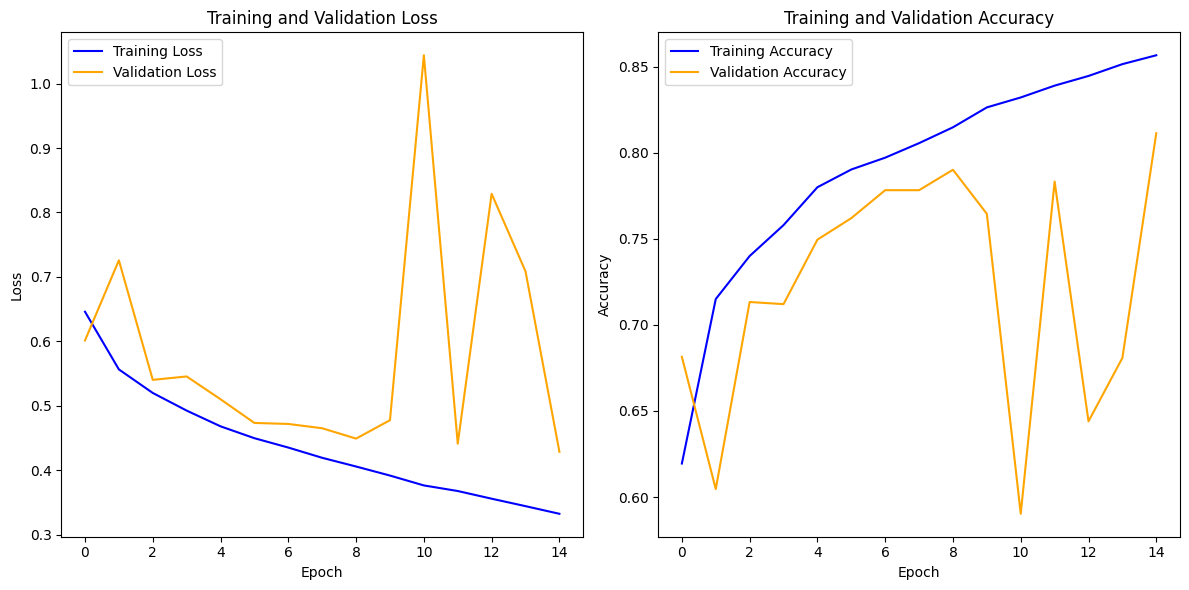

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='blue')
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [25]:
import torch
from torch.utils.data import DataLoader, SubsetRandomSampler
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms

train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
batch_size = 32

full_dataset = ImageFolder('/kaggle/input/cat-and-dog/training_set/training_set')
test_dataset = ImageFolder('/kaggle/input/cat-and-dog/test_set/test_set',val_transform)

total_train = len(full_dataset)
train_size = int(0.8 * total_train)
val_size = total_train - train_size

train_dataset, val_dataset = torch.utils.data.random_split(full_dataset, [train_size, val_size])

train_dataset.dataset.transform = train_transform
val_dataset.dataset.transform = val_transform

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset,batch_size =batch_size,shuffle=False)

In [26]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 14 * 14, 512)
        self.relu5 = nn.ReLU()
        self.fc2 = nn.Linear(512, 1)
        
    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu3(self.conv3(x)))
        x = self.pool4(self.relu4(self.conv4(x)))
        x = self.flatten(x)
        x = self.relu5(self.fc1(x))
        x = self.fc2(x)
        return x
    
model = SimpleCNN().to(device)
optimizer = optim.Adagrad(model.parameters(), lr=0.001, weight_decay=1e-4)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

criterion = nn.BCEWithLogitsLoss()
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels.unsqueeze(1).float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        correct_train += (predicted == labels.unsqueeze(1).float()).sum().item()
        total_train += labels.size(0)
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)  
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            val_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_val += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_val += labels.size(0)
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)
    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            test_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_test += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_test += labels.size(0)
    test_accuracy = correct_test / total_test
    test_loss /= len(test_loader)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')
print(f'Final Test Loss: {test_loss:.4f}, Final Test Acc: {test_accuracy:.4f}')

Epoch 1/10, Train Loss: 0.6634, Train Acc: 0.5988, Val Loss: 0.6374, Val Acc: 0.6527
Epoch 2/10, Train Loss: 0.5793, Train Acc: 0.7007, Val Loss: 0.5828, Val Acc: 0.6821
Epoch 3/10, Train Loss: 0.5415, Train Acc: 0.7269, Val Loss: 0.5523, Val Acc: 0.7164
Epoch 4/10, Train Loss: 0.5109, Train Acc: 0.7517, Val Loss: 0.5328, Val Acc: 0.7252
Epoch 5/10, Train Loss: 0.4889, Train Acc: 0.7603, Val Loss: 0.5773, Val Acc: 0.7008
Epoch 6/10, Train Loss: 0.4673, Train Acc: 0.7758, Val Loss: 0.5585, Val Acc: 0.7133
Epoch 7/10, Train Loss: 0.4481, Train Acc: 0.7904, Val Loss: 0.5004, Val Acc: 0.7539
Epoch 8/10, Train Loss: 0.4294, Train Acc: 0.7981, Val Loss: 0.5048, Val Acc: 0.7558
Epoch 9/10, Train Loss: 0.4100, Train Acc: 0.8123, Val Loss: 0.5747, Val Acc: 0.7220
Epoch 10/10, Train Loss: 0.3987, Train Acc: 0.8196, Val Loss: 0.5473, Val Acc: 0.7308
Final Test Loss: 0.5307, Final Test Acc: 0.7538


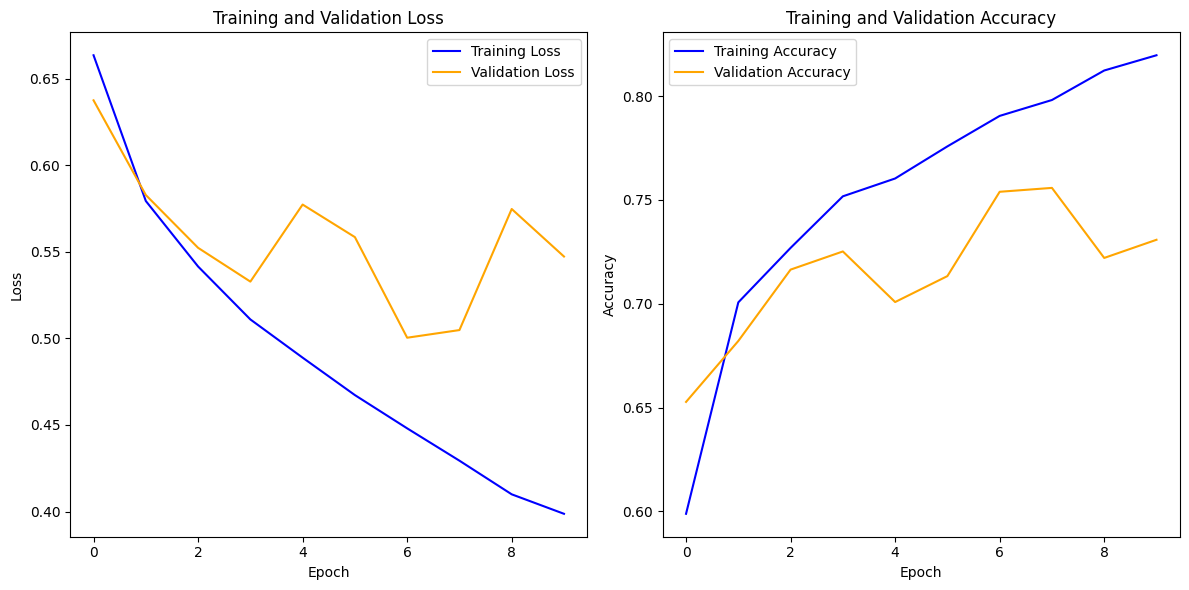

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='blue')
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [28]:
class SimpleCNN(nn.Module):
    def __init__(self, dropout_rate=0.5):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout1 = nn.Dropout(dropout_rate)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout2 = nn.Dropout(dropout_rate)
        
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout3 = nn.Dropout(dropout_rate)
        
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.relu4 = nn.ReLU()
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout4 = nn.Dropout(dropout_rate)
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 14 * 14, 512)
        self.bn5 = nn.BatchNorm1d(512)
        self.relu5 = nn.ReLU()
        self.dropout5 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(512, 1)
        
    def forward(self, x):
        x = self.dropout1(self.pool1(self.relu1(self.bn1(self.conv1(x)))))
        x = self.dropout2(self.pool2(self.relu2(self.bn2(self.conv2(x)))))
        x = self.dropout3(self.pool3(self.relu3(self.bn3(self.conv3(x)))))
        x = self.dropout4(self.pool4(self.relu4(self.bn4(self.conv4(x)))))
        x = self.flatten(x)
        x = self.dropout5(self.relu5(self.bn5(self.fc1(x))))
        x = self.fc2(x)
        return x

model = SimpleCNN(dropout_rate=0.5).to(device)

optimizer = optim.Adagrad(model.parameters(), lr=0.001, weight_decay=1e-4)

criterion = nn.BCEWithLogitsLoss()
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels.unsqueeze(1).float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        correct_train += (predicted == labels.unsqueeze(1).float()).sum().item()
        total_train += labels.size(0)
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    model.eval()
    correct_val = 0
    total_val = 0
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)  
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            val_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_val += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_val += labels.size(0)
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)
    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            test_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_test += (predicted == labels.unsqueeze(1).float()).sum().item()
            total_test += labels.size(0)
    test_accuracy = correct_test / total_test
    test_loss /= len(test_loader)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')
print(f'Final Test Loss: {test_loss:.4f}, Final Test Acc: {test_accuracy:.4f}')

Epoch 1/10, Train Loss: 0.6709, Train Acc: 0.6118, Val Loss: 0.8816, Val Acc: 0.5047
Epoch 2/10, Train Loss: 0.6180, Train Acc: 0.6560, Val Loss: 0.8962, Val Acc: 0.5066
Epoch 3/10, Train Loss: 0.6040, Train Acc: 0.6676, Val Loss: 0.9571, Val Acc: 0.5084
Epoch 4/10, Train Loss: 0.5855, Train Acc: 0.6790, Val Loss: 0.9737, Val Acc: 0.5066
Epoch 5/10, Train Loss: 0.5694, Train Acc: 0.7033, Val Loss: 1.1144, Val Acc: 0.5078
Epoch 6/10, Train Loss: 0.5590, Train Acc: 0.7099, Val Loss: 0.8969, Val Acc: 0.5259
Epoch 7/10, Train Loss: 0.5483, Train Acc: 0.7131, Val Loss: 1.0108, Val Acc: 0.5222
Epoch 8/10, Train Loss: 0.5426, Train Acc: 0.7230, Val Loss: 1.0424, Val Acc: 0.5153
Epoch 9/10, Train Loss: 0.5239, Train Acc: 0.7359, Val Loss: 1.0341, Val Acc: 0.5315
Epoch 10/10, Train Loss: 0.5251, Train Acc: 0.7378, Val Loss: 1.1583, Val Acc: 0.5122
Final Test Loss: 1.1522, Final Test Acc: 0.5072
